In [5]:
import pandas as pd

df = pd.read_csv("../data/loan_data.csv")
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,Yes,2026,3610,679,240,1,Semiurban,N
1,Female,Yes,2,Not Graduate,No,4724,4255,68,300,1,Semiurban,Y
2,Male,Yes,0,Not Graduate,No,16569,14484,72,180,1,Urban,N
3,Male,No,0,Graduate,No,13036,11015,462,120,1,Urban,Y
4,Male,Yes,0,Graduate,No,15047,7397,79,120,1,Urban,N


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             500 non-null    object
 1   Married            500 non-null    object
 2   Dependents         500 non-null    object
 3   Education          500 non-null    object
 4   Self_Employed      500 non-null    object
 5   ApplicantIncome    500 non-null    int64 
 6   CoapplicantIncome  500 non-null    int64 
 7   LoanAmount         500 non-null    int64 
 8   Loan_Amount_Term   500 non-null    int64 
 9   Credit_History     500 non-null    int64 
 10  Property_Area      500 non-null    object
 11  Loan_Status        500 non-null    object
dtypes: int64(5), object(7)
memory usage: 47.0+ KB


In [7]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,500.000000,500.000000,500.000000,500.00000,500.000000
mean,12813.130000,7942.214000,390.606000,242.52000,0.796000
std,6779.827956,4166.591073,192.593112,86.45808,0.403373
min,1511.000000,16.000000,50.000000,120.00000,0.000000
25%,7172.250000,4571.500000,227.750000,180.00000,1.000000
50%,12950.500000,8261.000000,392.500000,240.00000,1.000000
75%,18227.000000,11424.500000,565.250000,300.00000,1.000000
max,24999.000000,14916.000000,699.000000,360.00000,1.000000


In [9]:
for col in df.columns:
    print(col, df[col].unique())

Gender ['Male' 'Female']
Married ['Yes' 'No']
Dependents ['1' '2' '0' '3+']
Education ['Graduate' 'Not Graduate']
Self_Employed ['Yes' 'No']
ApplicantIncome [ 2026  4724 16569 13036 15047 19759  3263 10212  7297 10708 24983  6609
 24528 18000  3933 23347 18467 21672  5667 19273  9857  7654 23304 10420
 19927 22081 21380 18662  1713  5262 14899 11268 12140  8231 21001  7291
 17322 10283 15121 17519  4220 10405 10627 23931 17885  7868 15556 13736
 19833 24616 15951 18801 21058 11933 17025 24898  1589 19593 11861 17869
  4541  1605 10578 19779  7590  7582 18518  3425 19940  8417 21028  2052
 23267  5411  4889 15129  3930  1958 14895  1707  2399 13153 17905 10101
  2394  2014 22788  5609 14758 16813 16849  8679 11826 13287  3060 15112
 19150 21522 21311  6280 19811 13394  3856  6290 18190 21549 11681  8557
 17582  2161  6144 17211  4420 17502 15525 10446 14232  7736 17809 23962
 15018  1852  8505 15536 18042  2456  3571 10095 16640 14303  4953  8175
  2455  7795 17421 19596 16782  6203  80

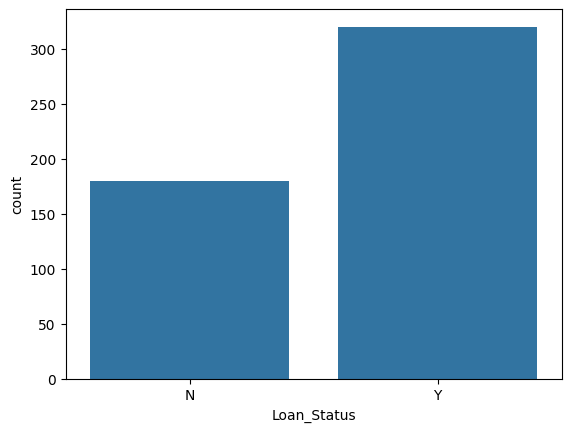

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Loan_Status', data=df)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

First 5 rows of the dataset:
   Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0    Male     Yes          1      Graduate           Yes             2026   
1  Female     Yes          2  Not Graduate            No             4724   
2    Male     Yes          0  Not Graduate            No            16569   
3    Male      No          0      Graduate            No            13036   
4    Male     Yes          0      Graduate            No            15047   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0               3610         679               240               1   
1               4255          68               300               1   
2              14484          72               180               1   
3              11015         462               120               1   
4               7397          79               120               1   

  Property_Area Loan_Status  
0     Semiurban           N  
1     Semiurban           Y

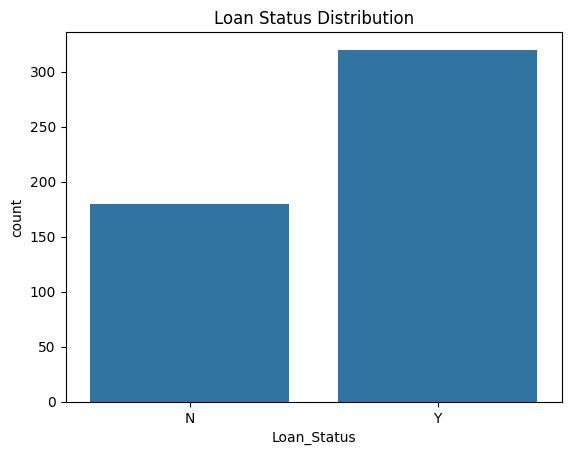

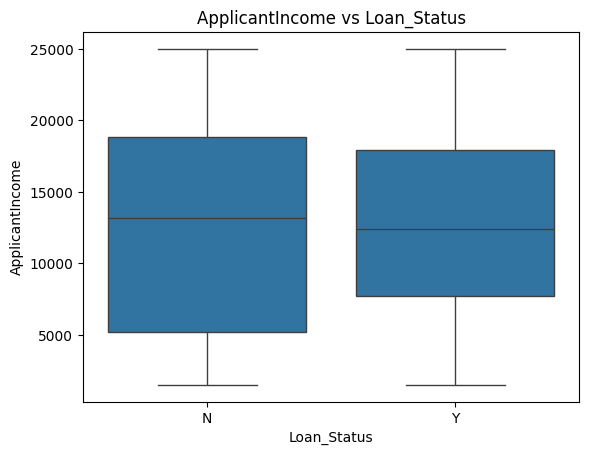

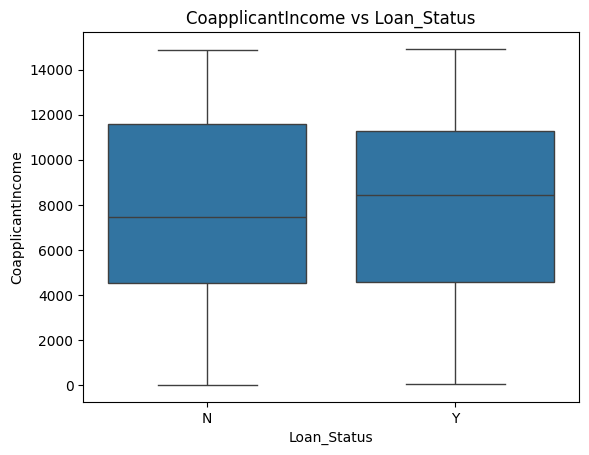

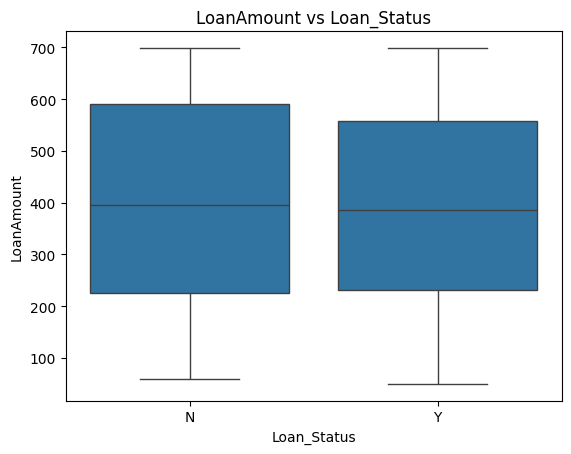

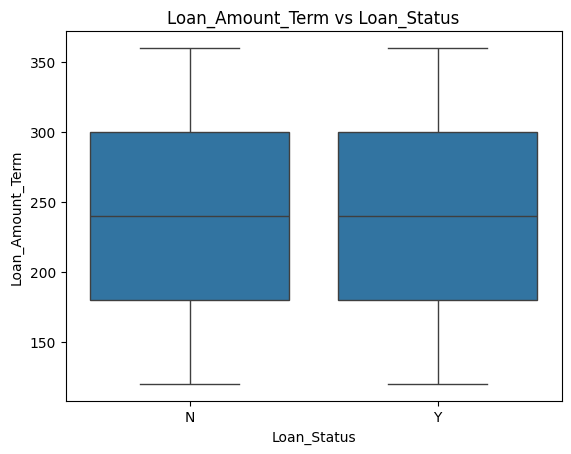

Accuracy Score: 0.7

Confusion Matrix:
 [[19 16]
 [14 51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.54      0.56        35
           1       0.76      0.78      0.77        65

    accuracy                           0.70       100
   macro avg       0.67      0.66      0.67       100
weighted avg       0.70      0.70      0.70       100



/var/folders/7t/zfwhs5c55895sc1ssmvm5h9c0000gn/T/ipykernel_8060/682235387.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
/var/folders/7t/zfwhs5c55895sc1ssmvm5h9c0000gn/T/ipykernel_8060/682235387.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

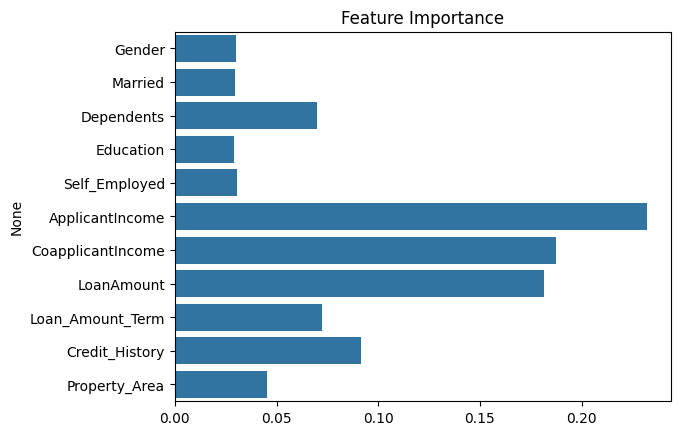

Model saved as loan_model.pkl


In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

# Visualize Loan Status distribution
sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Status Distribution")
plt.show()

# Visualize numeric features
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for feature in numeric_features:
    sns.boxplot(x='Loan_Status', y=feature, data=df)
    plt.title(f"{feature} vs Loan_Status")
    plt.show()


df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Encode categorical variables
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Encode target variable
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])  # Y -> 1, N -> 0

# Feature & Target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Optional: Standardize numeric features
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Model Training
# -----------------------------
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 7: Model Evaluation
# -----------------------------
y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 8: Feature Importance
# -----------------------------
importances = model.feature_importances_
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importance")
plt.show()

#  Step 9: Save Model
# -----------------------------
joblib.dump(model, 'loan_model.pkl')
print("Model saved as loan_model.pkl")

--- Logistic Regression ---
Accuracy: 0.76
Confusion Matrix:
 [[18 17]
 [ 7 58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.51      0.60        35
           1       0.77      0.89      0.83        65

    accuracy                           0.76       100
   macro avg       0.75      0.70      0.71       100
weighted avg       0.75      0.76      0.75       100



--- Decision Tree ---
Accuracy: 0.55
Confusion Matrix:
 [[15 20]
 [25 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.43      0.40        35
           1       0.67      0.62      0.64        65

    accuracy                           0.55       100
   macro avg       0.52      0.52      0.52       100
weighted avg       0.56      0.55      0.56       100



--- K-Nearest Neighbors ---
Accuracy: 0.63
Confusion Matrix:
 [[ 9 26]
 [11 54]]
Classification Report:
               precision    recall

/var/folders/7t/zfwhs5c55895sc1ssmvm5h9c0000gn/T/ipykernel_8060/2987521008.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({"Model": [name], "Accuracy": [acc]})], ignore_index=True)
/Users/nitesh/loan-approval-ml-project/venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [09:07:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- XGBoost ---
Accuracy: 0.7
Confusion Matrix:
 [[22 13]
 [17 48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.63      0.59        35
           1       0.79      0.74      0.76        65

    accuracy                           0.70       100
   macro avg       0.68      0.68      0.68       100
weighted avg       0.71      0.70      0.70       100



Model Performance Comparison:
                 Model  Accuracy
0  Logistic Regression      0.76
3        Random Forest      0.70
5              XGBoost      0.70
4    Gradient Boosting      0.68
2  K-Nearest Neighbors      0.63
1        Decision Tree      0.55


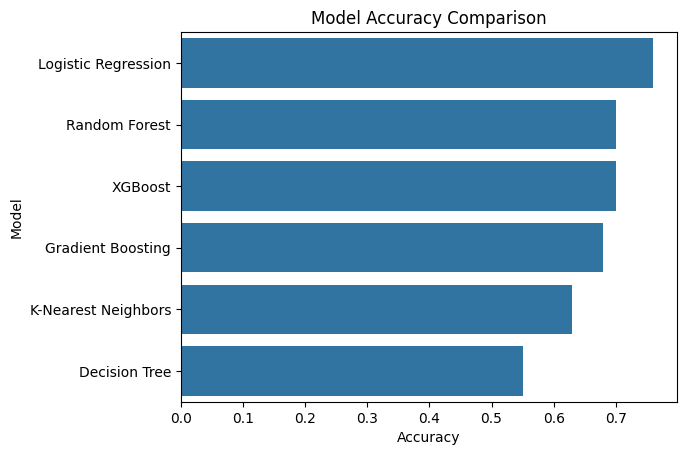

In [13]:
# Training Multiple Models and Evaluate
# -----------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Dictionary of models to try
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# DataFrame to store results
results = pd.DataFrame(columns=["Model", "Accuracy"])

# Train, predict, and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"--- {name} ---")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")
    
    # Store results
    results = pd.concat([results, pd.DataFrame({"Model": [name], "Accuracy": [acc]})], ignore_index=True)

# -----------------------------
# Step 8: Compare Model Performance
# -----------------------------
results = results.sort_values(by="Accuracy", ascending=False)
print("Model Performance Comparison:")
print(results)

# Visualize model performance
sns.barplot(x="Accuracy", y="Model", data=results)
plt.title("Model Accuracy Comparison")
plt.show()

In [14]:
# Get the best model name
best_model_name = results.iloc[0]['Model']
print("Best Model:", best_model_name)

# Retrieve the actual model object
best_model = models[best_model_name]

Best Model: Logistic Regression


In [15]:
import joblib

joblib.dump(best_model, 'best_loan_model.pkl')
print(f"{best_model_name} saved as best_loan_model.pkl")

Logistic Regression saved as best_loan_model.pkl


In [16]:
# Load the model
loaded_model = joblib.load('best_loan_model.pkl')

In [18]:
# Example new applicant data
new_data = pd.DataFrame({
    'Gender': [1],               # Male=1, Female=0 (depending on your encoding)
    'Married': [0],              # Yes=1, No=0
    'Dependents': [0],           # Number of dependents
    'Education': [1],            # Graduate=1, Not Graduate=0
    'Self_Employed': [0],        # Yes=1, No=0
    'ApplicantIncome': [5000],
    'CoapplicantIncome': [2000],
    'LoanAmount': [150],
    'Loan_Amount_Term': [360],
    'Credit_History': [1],
    'Property_Area': [2]         # Urban=2, Semiurban=1, Rural=0 (your encoding)
})

# Scale numeric features if you used StandardScaler
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
new_data[numeric_features] = scaler.transform(new_data[numeric_features])

# Predict
prediction = loaded_model.predict(new_data)
prediction_label = "Approved" if prediction[0] == 1 else "Not Approved"
print("Loan Prediction for new applicant:", prediction_label)

Loan Prediction for new applicant: Approved


In [19]:
#  Predict Loan for Manual Input
# -----------------------------
def manual_input_prediction(model, scaler):
    print("Enter applicant details below:")

    # Collect input from user
    gender = int(input("Gender (Male=1, Female=0): "))
    married = int(input("Married (Yes=1, No=0): "))
    dependents = int(input("Number of Dependents (0,1,2,3+ as 3): "))
    education = int(input("Education (Graduate=1, Not Graduate=0): "))
    self_employed = int(input("Self Employed (Yes=1, No=0): "))
    applicant_income = float(input("Applicant Income: "))
    coapplicant_income = float(input("Coapplicant Income: "))
    loan_amount = float(input("Loan Amount: "))
    loan_amount_term = float(input("Loan Amount Term (in months): "))
    credit_history = int(input("Credit History (Yes=1, No=0): "))
    property_area = int(input("Property Area (Urban=2, Semiurban=1, Rural=0): "))

    # Create DataFrame
    new_data = pd.DataFrame({
        'Gender': [gender],
        'Married': [married],
        'Dependents': [dependents],
        'Education': [education],
        'Self_Employed': [self_employed],
        'ApplicantIncome': [applicant_income],
        'CoapplicantIncome': [coapplicant_income],
        'LoanAmount': [loan_amount],
        'Loan_Amount_Term': [loan_amount_term],
        'Credit_History': [credit_history],
        'Property_Area': [property_area]
    })

    # Scale numeric features
    numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
    new_data[numeric_features] = scaler.transform(new_data[numeric_features])

    # Predict
    prediction = model.predict(new_data)
    prediction_label = "Approved" if prediction[0] == 1 else "Not Approved"

    print("\nLoan Prediction Result:", prediction_label)

# Example usage
manual_input_prediction(best_model, scaler)

Enter applicant details below:


Gender (Male=1, Female=0):  1
Married (Yes=1, No=0):  1
Number of Dependents (0,1,2,3+ as 3):  3
Education (Graduate=1, Not Graduate=0):  0
Self Employed (Yes=1, No=0):  0
Applicant Income:  344
Coapplicant Income:  0
Loan Amount:  5000
Loan Amount Term (in months):  456
Credit History (Yes=1, No=0):  0
Property Area (Urban=2, Semiurban=1, Rural=0):  0



Loan Prediction Result: Not Approved
